### Importing Libraries and dependecies

In [29]:
# Importing core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing and model building
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score  # Metrics for classification
from sklearn.metrics import r2_score  # Metrics for regression

### Loading Data

In [30]:
data = pd.read_csv("insurance2.csv")

In [31]:
data.head() #checking data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [33]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0
insuranceclaim,0


In [34]:
data.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


### EDA (Exploratory Data Analysis)

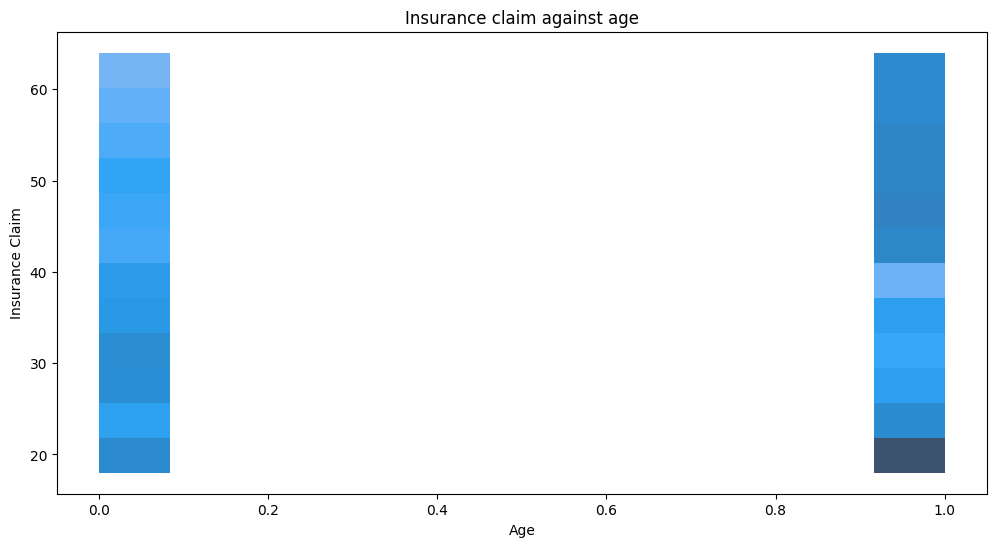

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(y="age", x="insuranceclaim", data=data)
plt.title ("Insurance claim against age")
plt.xlabel("Age")
plt.ylabel("Insurance Claim")
plt.show()

### Model selction and Building

In [36]:
# Divinding data with dependent and independet vraiables

In [37]:
x=data.drop(['insuranceclaim'],axis=1)
y=data['insuranceclaim']

In [38]:
#Distrubuting data for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80)

#### Logistic regression

In [39]:
model_lr = LogisticRegression()


In [40]:
model_lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_hat = model_lr.predict(x_test)

In [42]:
conf_matrix = confusion_matrix(y_test,y_hat)
print(conf_matrix)

accuracy = accuracy_score(y_test, y_hat)
print("\nAccuracy Score:", accuracy)

r2 = r2_score(y_test, y_hat)
print("\nR² Score (based on predicted probabilities):", r2)

[[ 81  23]
 [ 20 144]]

Accuracy Score: 0.8395522388059702

R² Score (based on predicted probabilities): 0.32434333958724215


### KNN

In [48]:
knn=KNeighborsClassifier(n_neighbors=5)

In [49]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
y_knn=knn.predict(x_test)

In [51]:
conf_matrix = confusion_matrix(y_test,y_knn)
print(conf_matrix)

accuracy = accuracy_score(y_test, y_knn)
print("\nAccuracy Score:", accuracy)

r2 = r2_score(y_test, y_knn)
print("\nR² Score (based on predicted probabilities):", r2)

[[ 47  57]
 [ 47 117]]

Accuracy Score: 0.6119402985074627

R² Score (based on predicted probabilities): -0.6341463414634143
